   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767

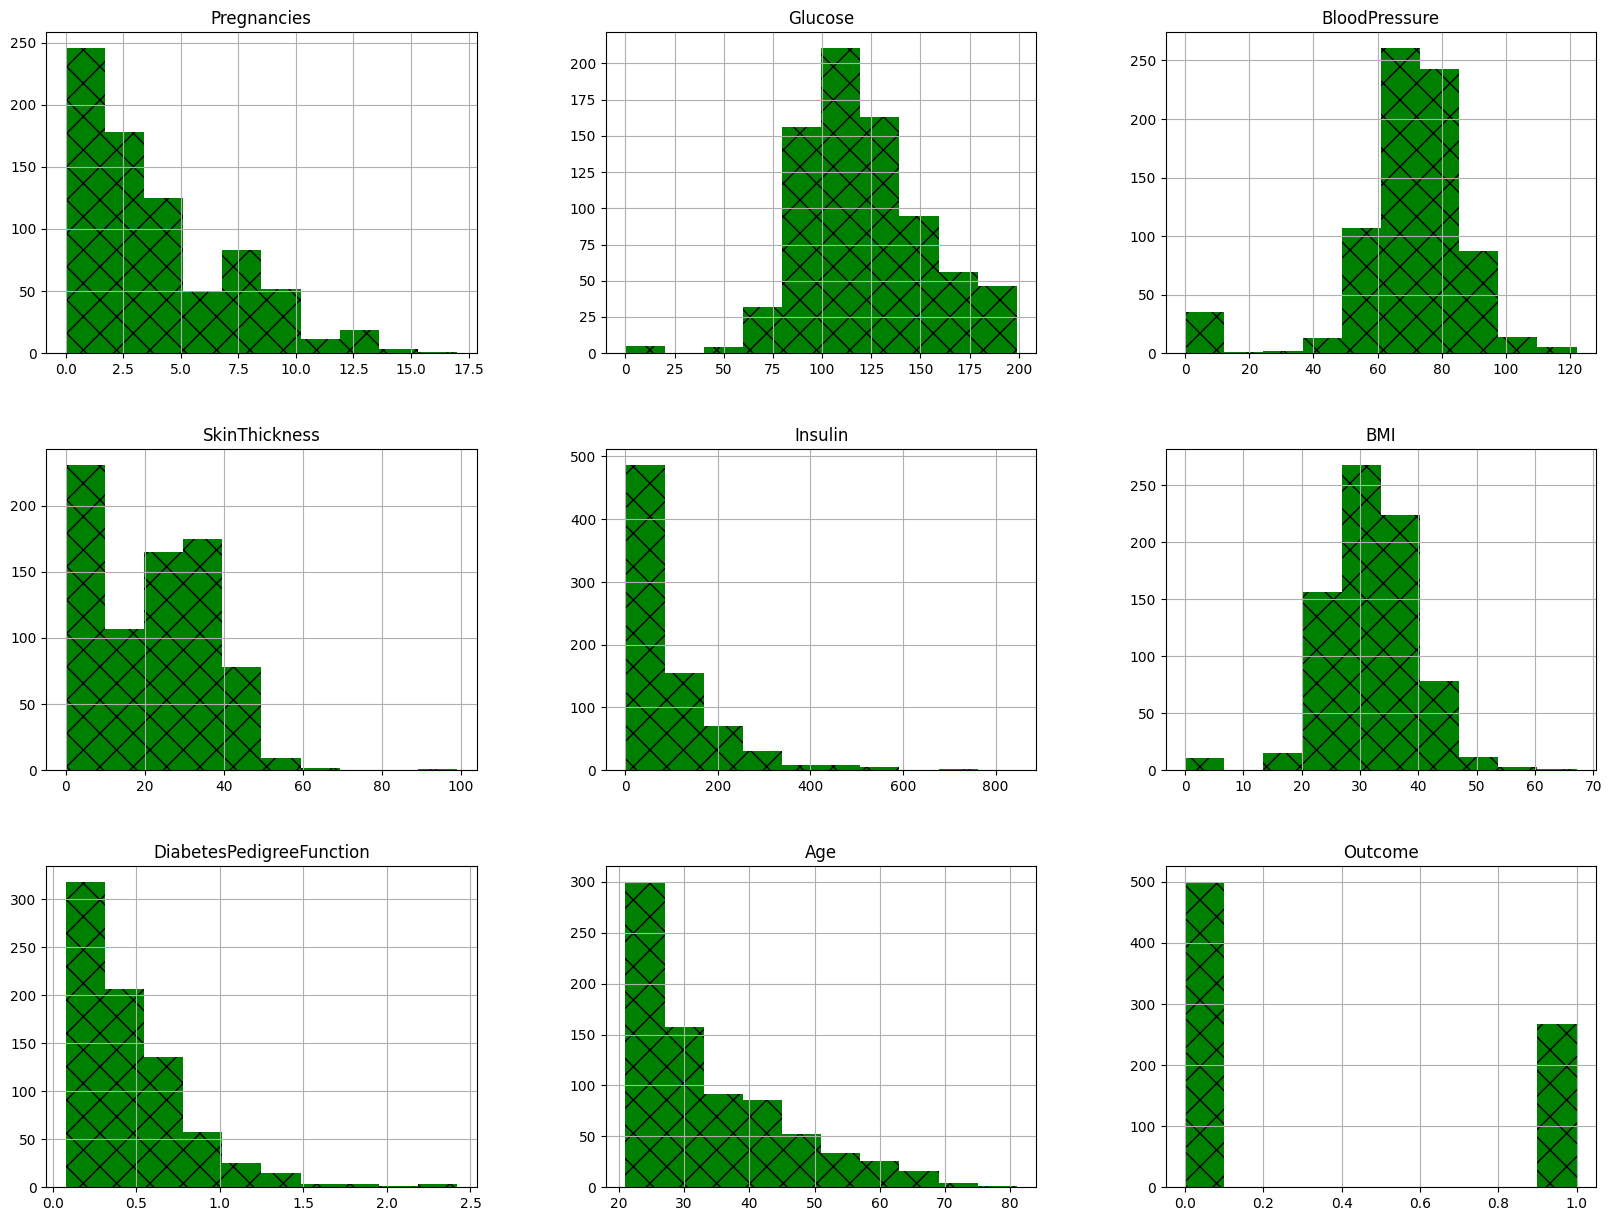

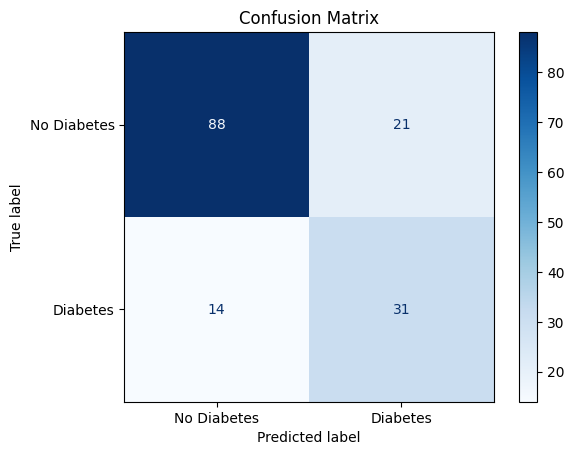

0.7727272727272727


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

url = "https://raw.githubusercontent.com/AdilAshfaq001/ML_DecisionTree_KNN_KMeans2/refs/heads/master/diabetes.csv?token=GHSAT0AAAAAADLOFQNXEVVEA5JVAE2OB66I2GZEOGA"

df = pd.read_csv(url)
print(df.head(3))
print(df.info())
print(df.shape)
print(df.isna().sum())
print(df.Insulin.sum())


df.hist(bins=10, figsize=(20,15), color='green', alpha=0.6, hatch='X');

X = df.iloc[:, 0:8]
y = df.iloc[:, 8]

xtr, xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=4)

sc = StandardScaler()

xtr = sc.fit_transform(xtr)
xte = sc.transform(xte)

clf = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')
clf.fit(xtr,ytr)

pred = clf.predict(xte)

cm =confusion_matrix(pred, yte)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Diabetes', 'Diabetes'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

print(accuracy_score(pred, yte))
